# 18_영화진흥원 OpenAPI

## OpenAPI란?

누구나 사용할 수 있도록 공개된 API

> **API**(Application Programming Interface) : 프로그램에서 데이터를 주고 받기 위한 방법

대부분의 OpenAPI는 데이터 교환 형식으로 JSON을 사용한다.

## 영화진흥위원회 OpenAPI 연동

[http://www.kobis.or.kr/kobisopenapi](http://www.kobis.or.kr/kobisopenapi)에 회원가입 후 키를 발급받아야 함

## #01. 기본 준비 단계

### 1) 필요한 패키지 가져오기

In [2]:
import requests
import json
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot

### 2) API 키 준비하기 

In [3]:
api_key = "62aa093993a32d3280249fc8417a88cb"

### 3) 세션 생성

In [4]:
user_agent = "Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Mobile Safari/537.36"
session = requests.Session()
session.headers.update({'User-agent':user_agent, 'referer':None})

## #02. 특정 날짜에 대한 박스오피스 관람객 수

영화진흥위원회의 OpenAPI는 오늘을 기준으로 하루 전날 까지의 데이터를 제공한다.

### 1) 접속 주소 준비하기 

#### 변수가 치환될 주소 템플릿

In [5]:
url_tpl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={date}"

#### 조회날짜 문자열 만들기 

여기서는 어제 날짜로 준비함

In [6]:
today = dt.datetime.now()                     # 오늘 날짜 
delta = dt.timedelta(days = -1)               # 하루 전을 의미하는 timedelta 객체
yesterday = today + delta                     # 오늘날짜와 timedelta 연산
yesterday_str = yesterday.strftime("%Y%m%d")  # yyyymmdd 형식 문자열로 변환
yesterday_str

'20200320'

#### 최종 접속 주소 확인

In [7]:
api_url = url_tpl.format(key=api_key, date=yesterday_str)
api_url

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=62aa093993a32d3280249fc8417a88cb&targetDt=20200320'

### 2) API를 통한 JSON 데이터 가져오기

#### OpenAPI를 통한 JSON 가져오기 

In [8]:
r = session.get(api_url)

# 접속에 실패한 경우
if r.status_code != 200 :
    #에러 코드와 에러 메세지 출력
    printf("[%d Error] %s" % (r.status_code, r.reason))
    # 프로그램 강제 종료 (Jupyter가 재시작됨)
    quit() 

# 인코딩 형식 지정 (대상 파일이 저장된 방식을 명시해야 함)    
r.encoding = "utf-8"

# 텍스트 출력 
r.text

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20200320~20200320","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20199842","movieNm":"인비저블맨","openDt":"2020-02-26","salesAmt":"80671740","salesShare":"24.4","salesInten":"22331560","salesChange":"38.3","salesAcc":"4016717280","audiCnt":"8919","audiInten":"1966","audiChange":"28.3","audiAcc":"460437","scrnCnt":"554","showCnt":"1400"},{"rnum":"2","rank":"2","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20192399","movieNm":"1917","openDt":"2020-02-19","salesAmt":"66291500","salesShare":"20.1","salesInten":"13509060","salesChange":"25.6","salesAcc":"5870307000","audiCnt":"7247","audiInten":"1169","audiChange":"19.2","audiAcc":"639680","scrnCnt":"501","showCnt":"1073"},{"rnum":"3","rank":"3","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20204791","movieNm":"다크 워터스 ","openDt":"2020-03-11","salesAmt":"39894800","salesShare":"12.1","salesInten":"5504840","salesChange":"16","salesA

#### JSON을 딕셔너리로 변환

In [9]:
daily_boxoffice_dict = json.loads(r.text)
daily_boxoffice_dict

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20200320~20200320',
  'dailyBoxOfficeList': [{'rnum': '1',
    'rank': '1',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20199842',
    'movieNm': '인비저블맨',
    'openDt': '2020-02-26',
    'salesAmt': '80671740',
    'salesShare': '24.4',
    'salesInten': '22331560',
    'salesChange': '38.3',
    'salesAcc': '4016717280',
    'audiCnt': '8919',
    'audiInten': '1966',
    'audiChange': '28.3',
    'audiAcc': '460437',
    'scrnCnt': '554',
    'showCnt': '1400'},
   {'rnum': '2',
    'rank': '2',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20192399',
    'movieNm': '1917',
    'openDt': '2020-02-19',
    'salesAmt': '66291500',
    'salesShare': '20.1',
    'salesInten': '13509060',
    'salesChange': '25.6',
    'salesAcc': '5870307000',
    'audiCnt': '7247',
    'audiInten': '1169',
    'audiChange': '19.2',
    'audiAcc': '639680',
    'scrnCnt': '501',
    'showCnt': '107

#### 딕셔너리를 데이터 프레임으로 변환

In [13]:
daily_boxoffice_df = DataFrame(daily_boxoffice_dict['boxOfficeResult']['dailyBoxOfficeList'])
daily_boxoffice_df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20199842,인비저블맨,2020-02-26,80671740,24.4,22331560,38.3,4016717280,8919,1966,28.3,460437,554,1400
1,2,2,0,OLD,20192399,1917,2020-02-19,66291500,20.1,13509060,25.6,5870307000,7247,1169,19.2,639680,501,1073
2,3,3,0,OLD,20204791,다크 워터스,2020-03-11,39894800,12.1,5504840,16,756416720,4453,297,7.1,87124,460,1028
3,4,4,1,OLD,20193321,정직한 후보,2020-02-12,14999440,4.5,3215980,27.3,12689590590,2494,406,19.4,1512476,282,452
4,5,5,-1,OLD,20205096,세인트 아가타,2020-03-19,18705840,5.7,-5753100,-23.5,44474760,2012,-891,-30.7,5080,365,654
5,6,6,2,OLD,20180523,스타 이즈 본,2018-10-09,8645340,2.6,2070900,31.5,4378664420,1695,402,31.1,514616,201,278
6,7,7,0,OLD,20192240,작은 아씨들,2020-02-12,13493100,4.1,2696420,25,7108127850,1528,186,13.9,843092,225,330
7,8,8,-2,OLD,20180962,지푸라기라도 잡고 싶은 짐승들,2020-02-19,13451840,4.1,1583260,13.3,5263809450,1500,93,6.6,606536,261,428
8,9,9,1,OLD,20167542,분노의 질주: 더 익스트림,2017-04-12,8731500,2.6,320500,3.8,29998298848,874,32,3.8,3654954,35,123
9,10,10,2,OLD,20135428,어바웃 타임,2013-12-05,4011000,1.2,1008000,33.6,25209231800,786,192,32.3,3432668,75,91


### 3) 데이터 전처리 

#### 사용할 컬럼만 추출

In [15]:
tmp_df = daily_boxoffice_df.filter(['movieNm','audiCnt'])
tmp_df

,movieNm,audiCnt
0,인비저블맨,8919
1,1917,7247
2,다크 워터스,4453
3,정직한 후보,2494
4,세인트 아가타,2012
5,스타 이즈 본,1695
6,작은 아씨들,1528
7,지푸라기라도 잡고 싶은 짐승들,1500
8,분노의 질주: 더 익스트림,874
9,어바웃 타임,786


#### 영화제목을 인덱스로 지정

In [79]:
name_dict = {}
for i, v in enumerate(list(tmp_df['movieNm'])):
    name_dict[i] = v 
    
daily_rank_df = tmp_df.rename(index=name_dict, columns={'audiCnt':'관람객'})    
daily_rank_df.drop('movieNm', axis=1, inplace=True)
daily_rank_df

,관람객
인비저블맨,8919
1917,7247
다크 워터스,4453
정직한 후보,2494
세인트 아가타,2012
스타 이즈 본,1695
작은 아씨들,1528
지푸라기라도 잡고 싶은 짐승들,1500
분노의 질주: 더 익스트림,874
어바웃 타임,786


#### ★★관람객 컬럼에 대한 데이터 타입 확인

외부에서 수집한 데이터의 경우 숫자 모양을 한 문자열 형식인 경우 대부분이기 때문에 반드시 분석할 컬럼만 출력하여  type을 확인 해야 한다.

type이 `int`, `float` 형식이 아닌 경우 타입 변환 처리가 필수적으로 요구 된다.

In [80]:
daily_rank_df['관람객'] = daily_rank_df['관람객'].apply(pd.to_numeric)
daily_rank_df['관람객'] 

인비저블맨               8919
1917                7247
다크 워터스              4453
정직한 후보              2494
세인트 아가타             2012
스타 이즈 본             1695
작은 아씨들              1528
지푸라기라도 잡고 싶은 짐승들    1500
분노의 질주: 더 익스트림       874
어바웃 타임               786
Name: 관람객, dtype: int64

### 4) 시각화

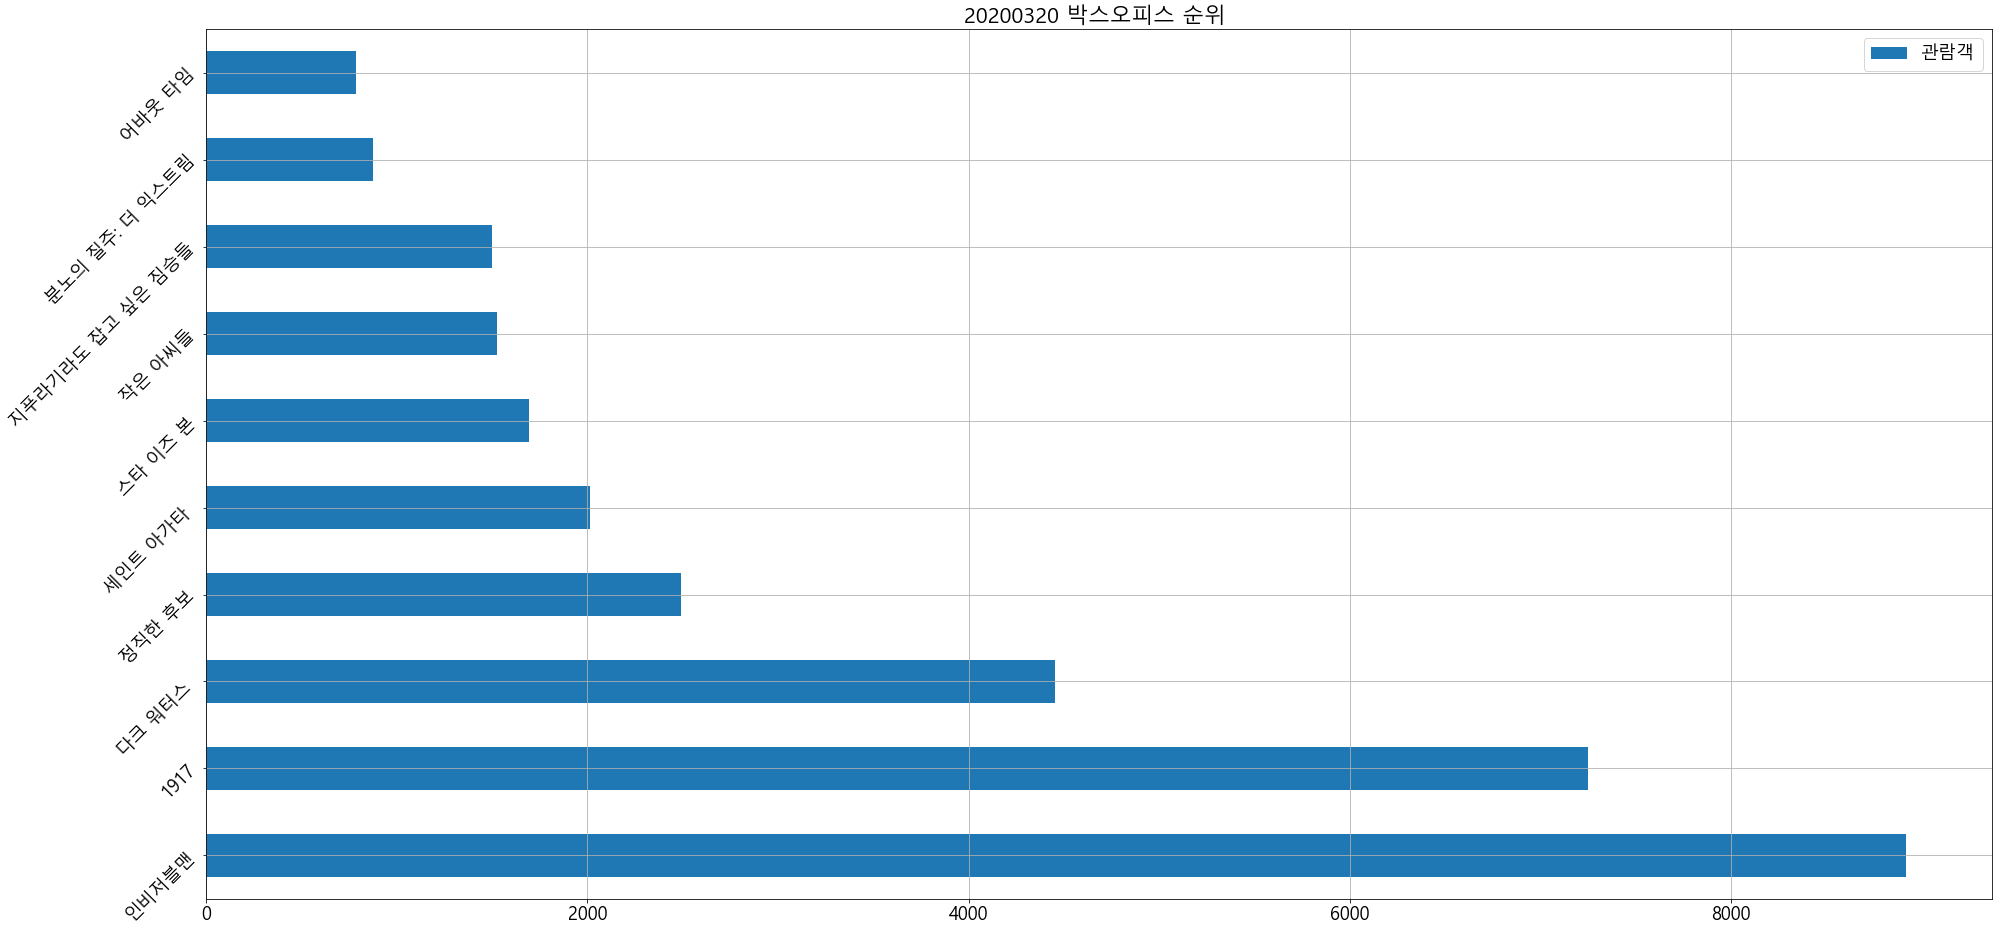

In [81]:
# 그래프를 만들기 위한 한글 폰트 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] =18
pyplot.rcParams["figure.figsize"] = (32,16)

# 전체 컬럼에 대한 시각화
daily_rank_df.plot.barh(rot=45)
pyplot.grid()
pyplot.title('%s 박스오피스 순위 ' % yesterday_str)
pyplot.legend()
pyplot.show()
pyplot.close()

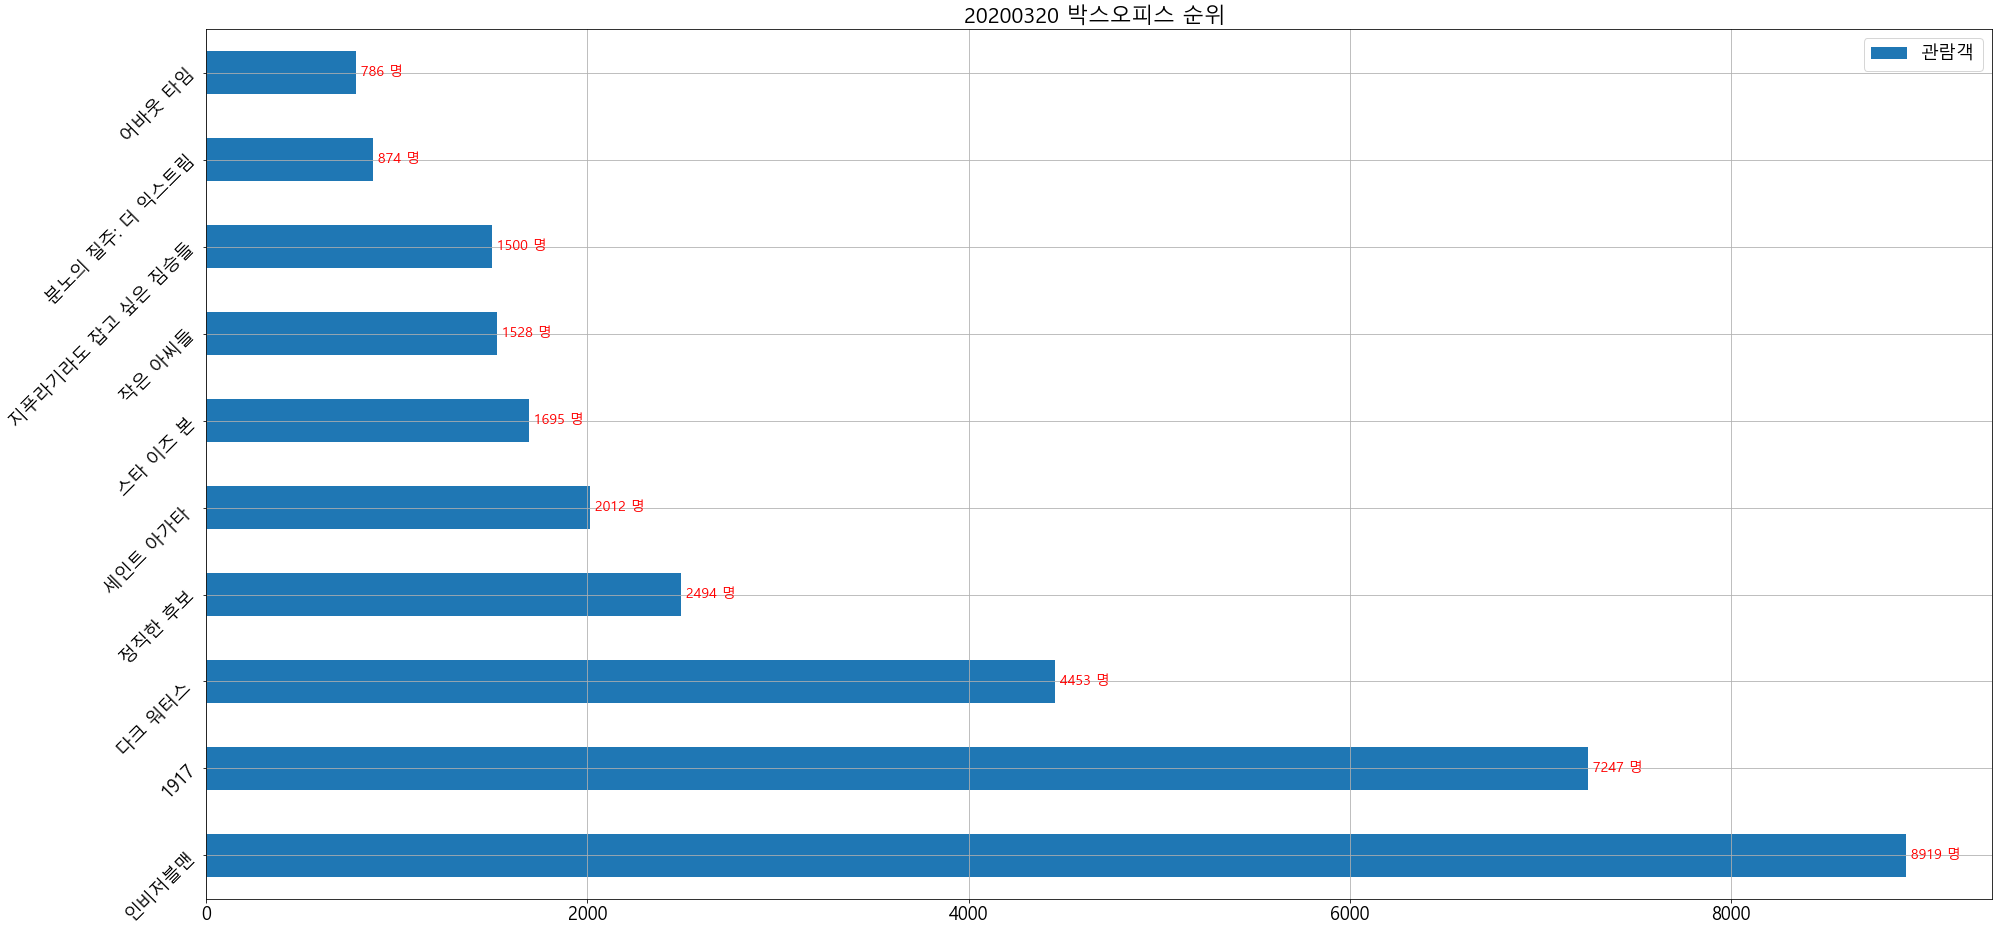

In [82]:
# 그래프를 만들기 위한 한글 폰트 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] =18
pyplot.rcParams["figure.figsize"] = (32,16)

# 전체 컬럼에 대한 시각화
daily_rank_df.plot.barh(rot=45)
pyplot.grid()
pyplot.title('%s 박스오피스 순위 ' % yesterday_str)
pyplot.legend()

for x, y in enumerate(list(daily_rank_df['관람객'])):
    txt = " %s 명" % y
    pyplot.text(y, x, txt, fontsize=14, color='#ff0000',horizontalalignment='left', verticalalignment='center')  
pyplot.show()
pyplot.close()

## #03. 영화별 1주일 간의 관람객 수 변동 현황

url에 접속하는 연동 부분을 하나의 블록으로 묶고 날짜를 변경해 가며 1주일간의 변화량 확인 한다.

### 1) 반복문을 수행하며 1 주일치 데이터 수집하기 

In [83]:
# 반복을 수해하면서 생성되는 데이터 프레임을 누적시킬 빈 데이터 프레임 준비
영화관람객수_df = DataFrame()

# 일주일간의 기간을 위한 반복문 구성
for i in range(-7, 0) :
    
    ######## 조회 날짜 문자열 만들기 
    today = dt.datetime.now()                        # 오늘날짜
    delta = dt.timedelta(days = i)                   # i일 전을 의미하는 timedelta객체
    yesterday = today + delta                        # 오늘 날짜와  timedelta 연산
    yesterday_str = yesterday.strftime("%Y%m%d")     # yyyymmdd 형식 문자열로 변환
    # print(yesterday_str)
    
    #### 최종 접수 주소 확인
    api_url = url_tpl.format(key=api_key, date=yesterday_str)
    
    #### API를 통한 JSON 데이터 가져오기 
    r = session.get(api_url)
    
    if r.status_code != 200 :
        #에러 코드와 에러 메세지 출력
        printf("[%d Error] %s" % (r.status_code, r.reason))
        # 프로그램 강제 종료 (Jupyter가 재시작됨)
        # quit() 
        continue

    # 인코딩 형식 지정 (대상 파일이 저장된 방식을 명시해야 함)    
    r.encoding = "utf-8"
    # print(r.text)
    # print("----" * 50)
    
    #### 데이터 프레임으로 변환
    daily_boxoffice_dict = json.loads(r.text)
    daily_boxoffice_df = DataFrame(daily_boxoffice_dict['boxOfficeResult']['dailyBoxOfficeList'])
    
    #### 사용할 컬럼만 추출
    tmp_df = daily_boxoffice_df.filter(['movieNm', 'audiCnt'])
    
    #### 영화제목을 인덱스로 지정하기 위한 딕셔너리 구성
    name_dict = {}
    for i, v in enumerate(list(tmp_df['movieNm'])):
        name_dict[i] = v
        
    # 인덱스 이름 변경, 컬럼이름 변경  ==> 관객수를 의미하는 컬럼을 해당 날짜로 변경한다.
    daily_rank_df = tmp_df.rename(index=name_dict, columns={'audiCnt':yesterday_str})
    daily_rank_df.drop('movieNm', axis=1, inplace=True)
    # print(daily_rank_df)
    # print("-" * 50)
    
    #### 관람객 컬럼의 타입을 숫자형식으로 변한
    daily_rank_df[yesterday_str] = daily_rank_df[yesterday_str].apply(pd.to_numeric)
    
    #### 영화관람(aily_rank_df의 인덱스)가 동일한 데이터를 기준으로 누적
    #### -> how 값을 outer로 지정하여 중복되지 않는 인덱스명(영화제목)도 누락되지 않도록 한다.
    영화관람객수_df = pd.merge(영화관람객수_df, daily_rank_df, left_index=True, right_index=True, how="outer")
    
#### 최종결과
영화관람객수_df    

,20200314,20200315,20200316,20200317,20200318,20200319,20200320
1917,16742.0,14834.0,5167.0,5004.0,5495.0,6078.0,7247.0
그린 북,NaN,NaN,530.0,NaN,NaN,NaN,NaN
다크 워터스,19100.0,16338.0,5421.0,5132.0,5780.0,4156.0,4453.0
더 보이 2: 돌아온 브람스,1306.0,1324.0,NaN,NaN,NaN,NaN,NaN
메멘토,1948.0,1611.0,759.0,755.0,843.0,NaN,NaN
분노의 질주: 더 익스트림,NaN,NaN,NaN,NaN,NaN,842.0,874.0
세인트 아가타,NaN,NaN,NaN,NaN,NaN,2903.0,2012.0
쉰들러 리스트,NaN,NaN,619.0,620.0,NaN,NaN,NaN
스타 이즈 본,3780.0,3348.0,1562.0,1479.0,1726.0,1293.0,1695.0
시원찮은 그녀를 위한 육성방법 피날레,NaN,NaN,NaN,NaN,NaN,960.0,NaN


### 2) 데이터 정제

#### 결측치 대체

관람객 수가 결측치인 경우는 병합과정에서 해당 날짜에 개봉하지 않은 영화를 의미한다.

결측치인 경우 관람객 수가 0이라는 의미이므로 결측치 대체법을 적용한다.

In [84]:
final_df = 영화관람객수_df.fillna(0)
final_df

,20200314,20200315,20200316,20200317,20200318,20200319,20200320
1917,16742.0,14834.0,5167.0,5004.0,5495.0,6078.0,7247.0
그린 북,0.0,0.0,530.0,0.0,0.0,0.0,0.0
다크 워터스,19100.0,16338.0,5421.0,5132.0,5780.0,4156.0,4453.0
더 보이 2: 돌아온 브람스,1306.0,1324.0,0.0,0.0,0.0,0.0,0.0
메멘토,1948.0,1611.0,759.0,755.0,843.0,0.0,0.0
분노의 질주: 더 익스트림,0.0,0.0,0.0,0.0,0.0,842.0,874.0
세인트 아가타,0.0,0.0,0.0,0.0,0.0,2903.0,2012.0
쉰들러 리스트,0.0,0.0,619.0,620.0,0.0,0.0,0.0
스타 이즈 본,3780.0,3348.0,1562.0,1479.0,1726.0,1293.0,1695.0
시원찮은 그녀를 위한 육성방법 피날레,0.0,0.0,0.0,0.0,0.0,960.0,0.0


### 3) 시각화

시간에 따른 데이터의 변화를 표현하기 적합한 현태 **선 그래프(=시계열 그래프)** 이다.

데이터 프레임을 선 그래프로 표현할 경우 인덱스가 y축, 컬럼이 x축으로 사용된다.

그러므로 현재 DataFrame을 바로 시각화 할 경우 x축이 날짜가 되고 y축이 영화 제목이 되어 버리기 때문에 x축과 y축이
서로 바뀐된 형태인 **전치**를 구해서 그래프로 표현해야 한다.

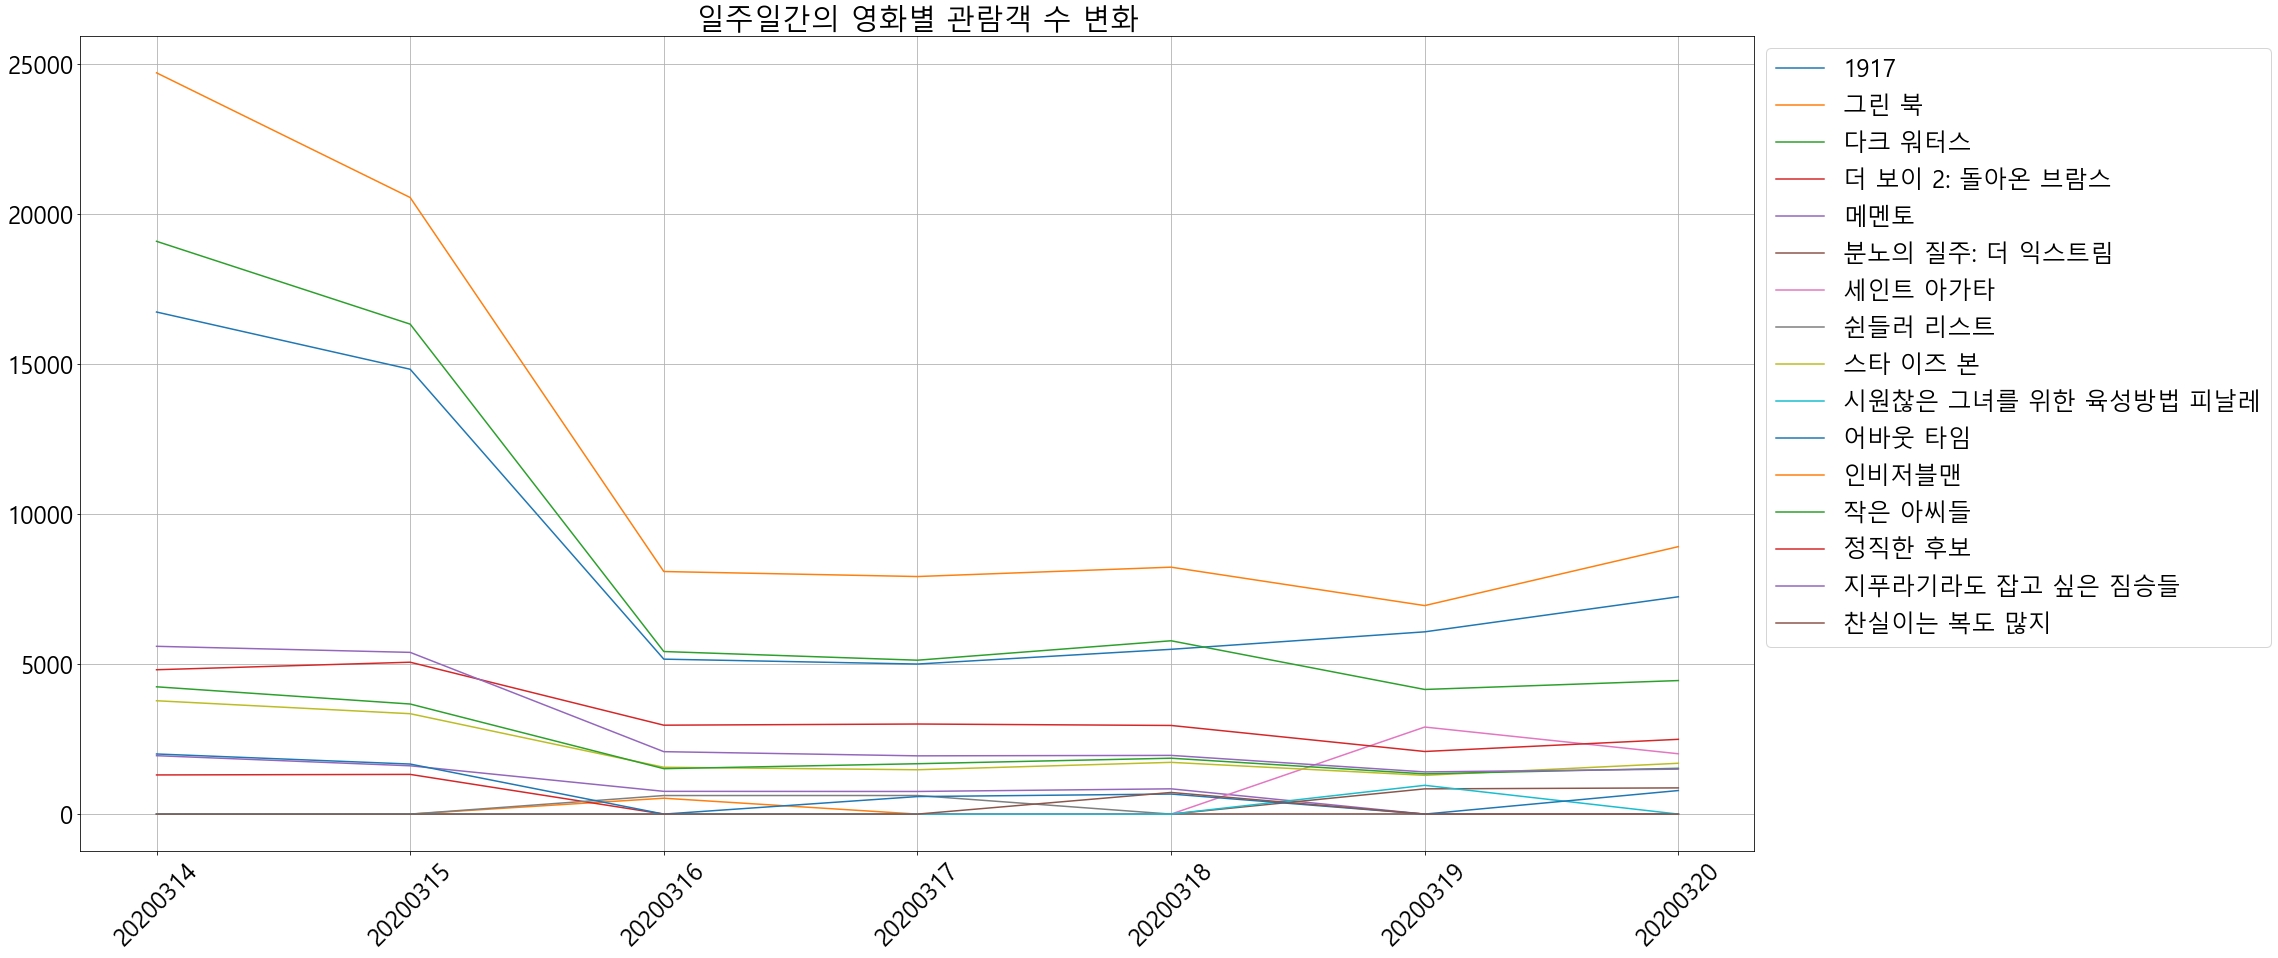

In [101]:
# 그래프를 만들기 위한 한글 폰트 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] =24
pyplot.rcParams["figure.figsize"] = (30,15)

# 전체 컬럼에 대한 시각화
final_df.T.plot(rot=45)
pyplot.grid()
pyplot.title('일주일간의 영화별 관람객 수 변화')
pyplot.legend(bbox_to_anchor=(1,1))
pyplot.show()
pyplot.close()